<a href="https://colab.research.google.com/github/emcfalls/NC-Datathon/blob/main/NC_Datathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Narratives:

Looking at the career trajectory for students from more disadvantaged school systems compared to those from advantaged school systems

- What CTE concentrations are more common in each system?
  - NC CTE Concentrators per school (dataset 4)
  
- What “push and pull” factors can influence participation in the CTE pathways, disaggregated by race and gender?
  - Chronic Absenteeism
  - College & Career-Ready in Math
  - College & Career-Ready in Reading

- What does the end of the k-12 pathway look like? Where do students from each system end up? Where are disparities (disaggregated by race, class, gender, etc.)
  - Employment Projections by Industry (dataset 1)
  - Employment Wages (dataset 2)
  - Prioritized non-degree credentials (dataset 8)

Be sure to report what we are making assumptions on
Maybe show future work

In [ ]:
import numpy as np
import pandas as pd
import missingno as msno

# Loading and Cleaning Data

In [ ]:
agency_codes = pd.read_excel("/content/drive/MyDrive/NC Datathon Data/2022-23 Agency Number to School Region .xlsx")
agency_codes.head()

,District Name,School\nCode,School Name,State Board\nRegion,Grade Span
0,Alamance-Burlington Schools,010303,ABSS Early College at ACC,Piedmont-Triad,09-13
1,Alamance-Burlington Schools,010304,Alexander Wilson Elementary,Piedmont-Triad,PK-05
2,Alamance-Burlington Schools,010308,Altamahaw-Ossipee Elementary,Piedmont-Triad,0K-05
3,Alamance-Burlington Schools,010310,Broadview Middle,Piedmont-Triad,06-08
4,Alamance-Burlington Schools,010311,Career and Technical Education Center,Piedmont-Triad,09-12


In [ ]:
concentrators = pd.read_excel("/content/drive/MyDrive/NC Datathon Data/Copy of Dataset 4 - 2017-2022 CTE concentrators.xlsx")
concentrators.head()
# number of concentrators is not broken down by demographic factors like the other tables

,year,agency_code,career_cluster,num_concentrators
0,2017,010303,AGNR,1
1,2017,010303,ARCH,1
2,2017,010303,BMA,1
3,2017,010303,INFO,1
4,2017,010303,LAW,1


In [ ]:
absent = pd.read_excel("/content/drive/MyDrive/NC Datathon Data/rcd_chronic_absent.xlsx")
absent.head()

,year,agency_code,subgroup,count,den,pct,masking
0,2018,010303,ALL,NaN,192,0.05,2.0
1,2018,010303,FEM,NaN,125,0.05,2.0
2,2018,010303,HI7,NaN,50,0.05,2.0
3,2018,010303,MALE,NaN,68,0.05,2.0
4,2018,010303,WH7,NaN,89,0.05,2.0


In [ ]:
standards = pd.read_csv("/content/drive/MyDrive/NC Datathon Data/rcd_acc_pc.txt", sep='\t')
standards.head()

<ipython-input-21-294d2f37e76f>:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  standards = pd.read_csv("/content/drive/MyDrive/NC Datathon Data/rcd_acc_pc.txt", sep='\t')


,year,agency_code,standard,subject,grade,subgroup,den,pct,masking
0,2014,010304,CCR,EOG,ALL,AIG,77,95.0,1.0
1,2014,010304,CCR,EOG,ALL,ALL,623,51.4,NaN
2,2014,010304,CCR,EOG,ALL,BL7,63,22.2,NaN
3,2014,010304,CCR,EOG,ALL,EDS,273,34.8,NaN
4,2014,010304,CCR,EOG,ALL,FEM,294,54.8,NaN


What years do we have? The data combined has data ranging from 2018-2022

In [ ]:
concentrators.year.unique()

array([2017, 2018, 2019, 2020, 2021, 2022])

In [ ]:
absent.year.unique()

array([2018, 2019, 2020, 2021, 2022])

In [ ]:
standards.year.unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2021, 2022])

In [ ]:
concentrators = concentrators[concentrators['year'].isin([2018, 2019, 2020, 2021, 2022])]
standards = standards[standards['year'].isin([2018, 2019, 2020, 2021, 2022])]

### Cleaning Data

In [ ]:
concentrators.describe()

,year,num_concentrators
count,25937.000000,25937.000000
mean,2019.785789,22.868875
std,1.461170,64.817347
min,2018.000000,0.000000
25%,2018.000000,1.000000
50%,2020.000000,8.000000
75%,2021.000000,23.000000
max,2022.000000,2839.000000


In [ ]:
# limiting subgroups to race, sex, disability status, and economical advantage/disadvantage (absent data does not have NEDS or NSWD)
standards = standards[standards['subgroup'].isin(['ALL', 'FEM', 'HI7', 'MALE', 'WH7', 'BL7', 'ELS', 'MU7', 'SWD',
       'AS7', 'AM7', 'PI7', 'EDS', 'NSWD', 'NEDS'])]

<Axes: >

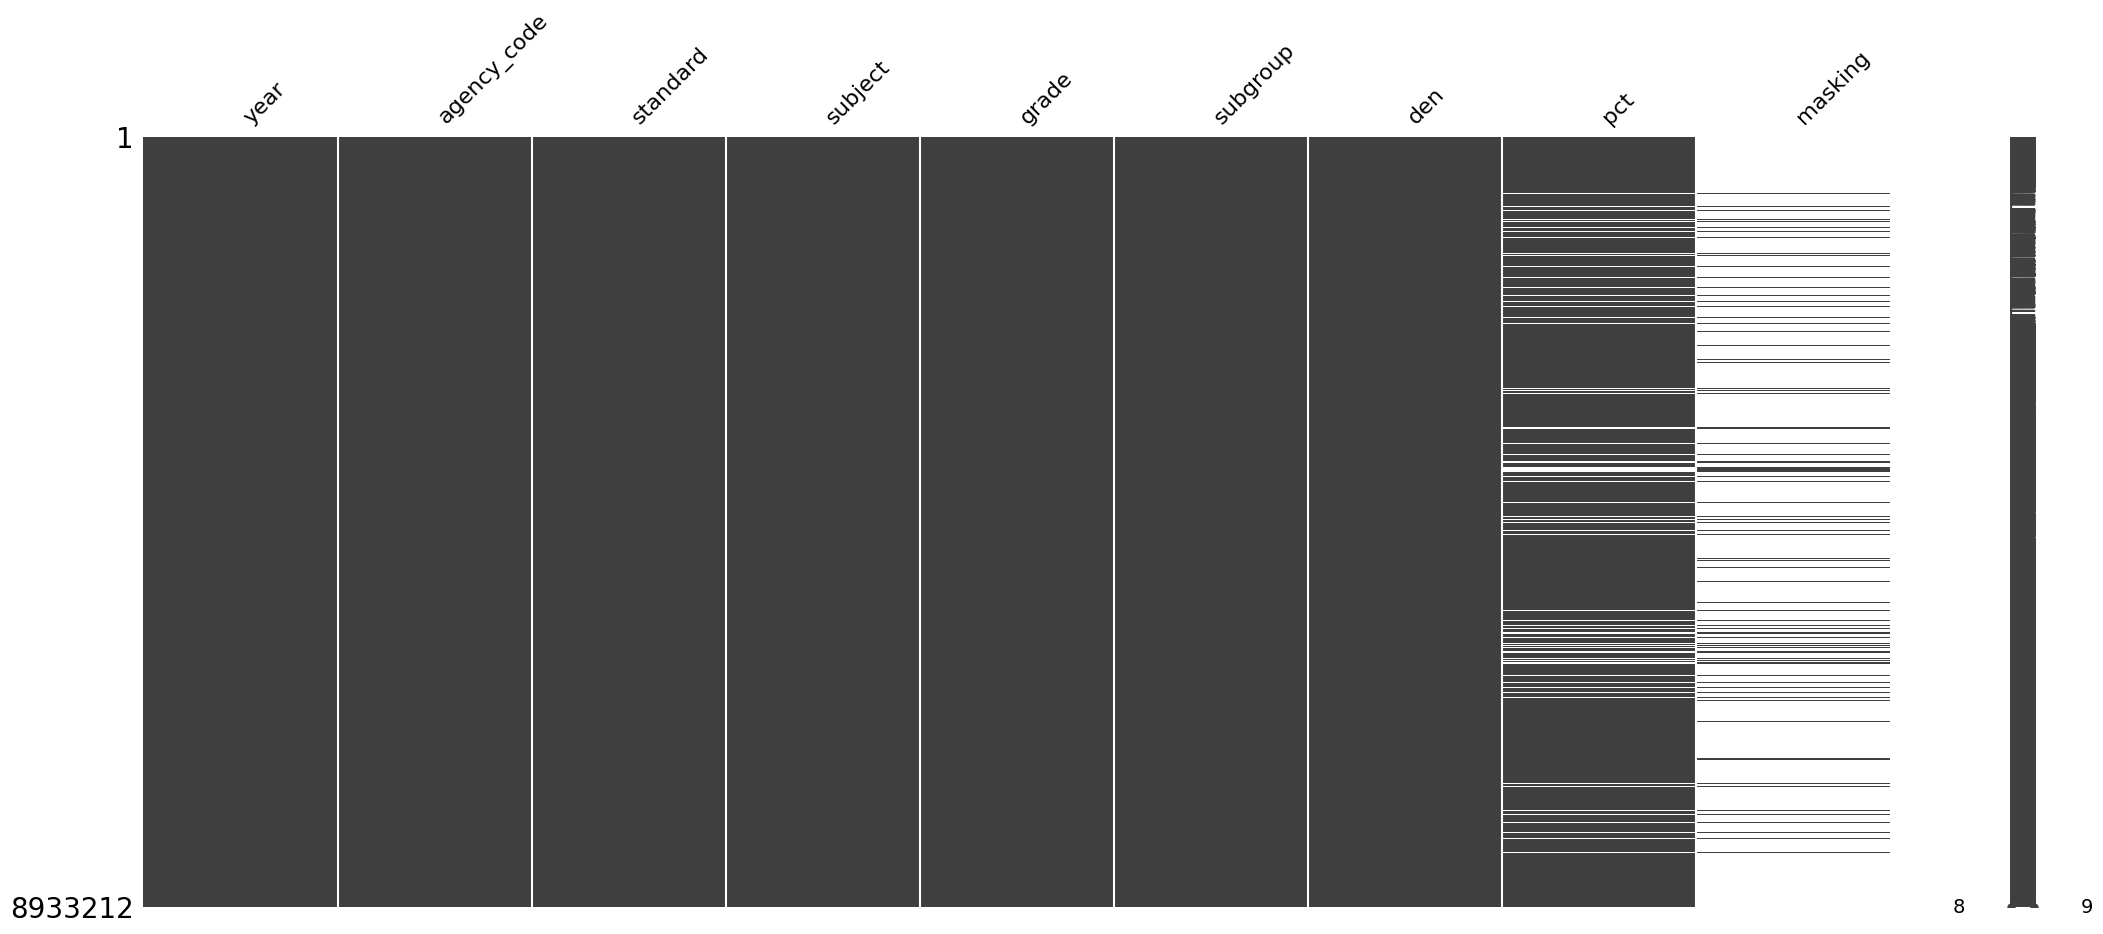

In [ ]:
msno.matrix(standards)

<Axes: >

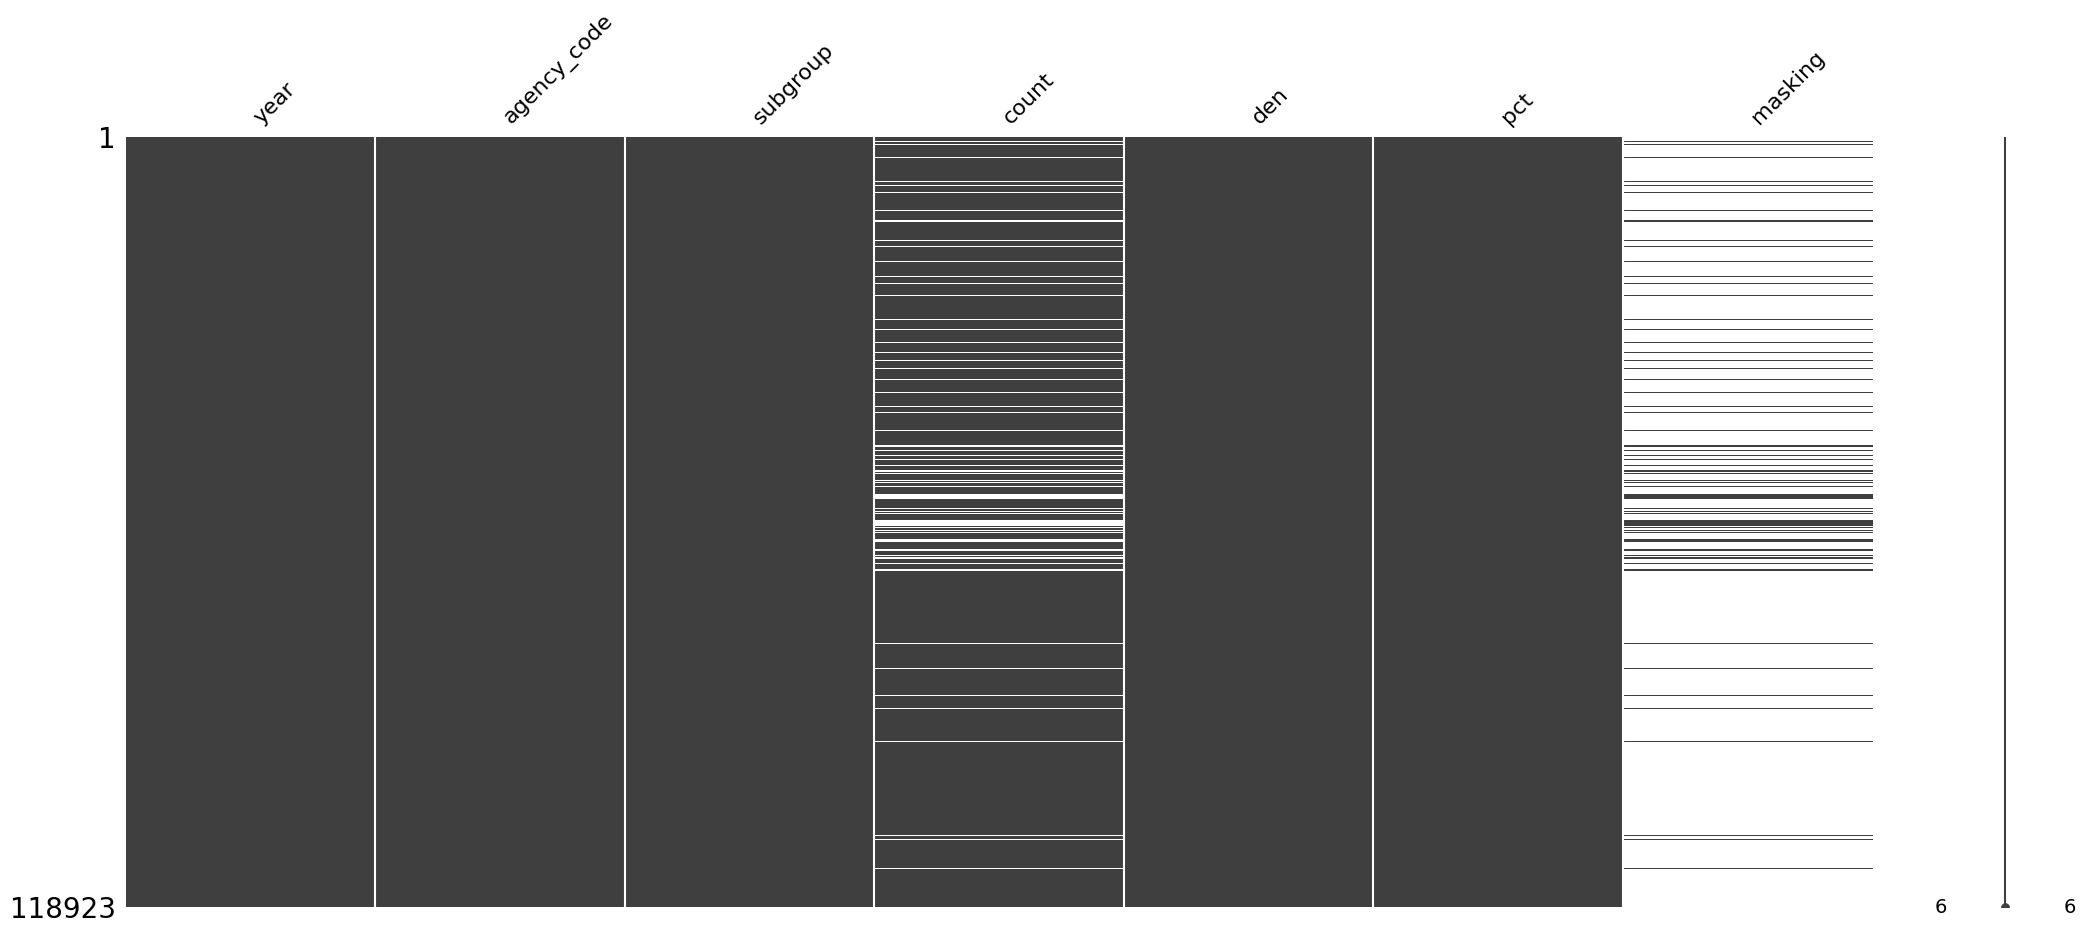

In [ ]:
msno.matrix(absent)

In [ ]:
absent

,year,agency_code,subgroup,count,den,pct,masking
0,2018,010303,ALL,NaN,192,0.050000,2.0
1,2018,010303,FEM,NaN,125,0.050000,2.0
2,2018,010303,HI7,NaN,50,0.050000,2.0
3,2018,010303,MALE,NaN,68,0.050000,2.0
4,2018,010303,WH7,NaN,89,0.050000,2.0
...,...,...,...,...,...,...,...
118918,2022,NC-SEA,MALE,250676.0,793809,0.315789,NaN
118919,2022,NC-SEA,MU7,29233.0,82722,0.353388,NaN
118920,2022,NC-SEA,PI7,863.0,2297,0.375707,NaN
118921,2022,NC-SEA,SWD,71230.0,184408,0.386263,NaN


## Combining Data

In [ ]:
standards = standards.rename(columns={"pct": "pct_standard", "masking": "masking_standard"})
absent = absent.rename(columns={"pct": "pct_absent", "masking": "masking_pct"})

In [ ]:
pd.merge(standards, absent, how = 'left', on = ['year', 'agency_code', 'subgroup'])

,year,agency_code,standard,subject,grade,subgroup,den_x,pct_standard,masking_standard,count,den_y,pct,masking
0,2018,00A000,CCR,BI,EOC,ALL,179,48.0,NaN,NaN,NaN,NaN,NaN
1,2018,00A000,GLP,BI,EOC,ALL,179,57.5,NaN,NaN,NaN,NaN,NaN
2,2018,00A000,CCR,BI,EOC,BL7,32,43.8,NaN,NaN,NaN,NaN,NaN
3,2018,00A000,GLP,BI,EOC,BL7,32,43.8,NaN,NaN,NaN,NaN,NaN
4,2018,00A000,CCR,BI,EOC,EDS,24,29.2,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8933207,2022,NC-SEA,NotProf,SC,ALL,SWD,29833,68.0,NaN,71230.0,184408.0,0.386263,NaN
8933208,2022,NC-SEA,L3,SC,ALL,WH7,103612,8.3,NaN,181118.0,692800.0,0.261429,NaN
8933209,2022,NC-SEA,L4,SC,ALL,WH7,103612,43.7,NaN,181118.0,692800.0,0.261429,NaN
8933210,2022,NC-SEA,L5,SC,ALL,WH7,103612,28.9,NaN,181118.0,692800.0,0.261429,NaN
